<h1 align="center">
Tarea computacional # 02. (Sobre paralelización)
</h1> 

<h2 align="center">
Valentina Franco Velásquez
</h2>

<h3 align="center">
FCEN, Instituto de Física, Universidad de Antioquia
</h3>

<p align="center">
Computación Avanzada
</p>

In [118]:
#@title <font color = 'green'>Paquete anomalies</font>

!pip install anomalies

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [120]:
#@title <font color = 'green'>Librerías</font>

import numpy as np
from anomalies import anomaly
from itertools import product
import time
import pandas as pd
from multiprocessing import Pool, cpu_count
import matplotlib.pyplot as plt

In [122]:
#@title <font color = 'green'>n's en los que se corre el programa</font>

# Lista de n's en los que se va a correr el programa

n = [5,6,7,8,9,10]

# Se define la función general de los programas

def func(arreglo,n):

  # Se divide el arreglo en las componentes k y l

  split = np.array_split(arreglo,2)
  k = split[0]
  l = split[1] 

  # Se obtiene la solución simplificada con el paquete anomaly
  
  anomaly.free(l,k)
  b = anomaly.free.simplified
  aux =[]

  # Se definen los criterios para que las componentes de la 
  # solución sean != 0 y estén en el rango [-30,30]
  
  for j in b:
    if j<-30. or j>30. or j == 0.:
      aux.append(False)
    else:
      aux.append(True)
      
  if np.array(aux).all() == True:
    # Se retorna un diccionario para listar las soluciones en un
    # data frame
    if (n%2) == 0.:
      return {"(k1, .., km, l1, ..., lm)": np.array(arreglo), "Sol": b, "mcd": anomaly.free.gcd}
    else:
      return {"(k1, .., km+1, l1, ..., lm)": np.array(arreglo), "Sol": b, "mcd": anomaly.free.gcd}

## Programa en paralelo

In [123]:
#@title <font color = 'green'>Código</font>

# Programa en paralelo

def paralelo(num):

  n = int(num)

  if (n%2) == 0.:
    m = int(n/2 - 1)
    arr = list(product(range(-3,4), repeat = 2*m))

  else: 
    m = int((n-3)/2)
    arr = list(product(range(-3,4), repeat = 2*m + 1))
  
  # Inicializando el tiempo

  start_p = time.time()

  # Se pone a trabajar el # de CPU's disponibles en paralelo para
  # encontrar las soluciones correspondientes a los arreglos k, l

  pool = Pool(cpu_count())

  result = np.array([pool.apply_async(func, args=(arr[i],n)).get() for i in range(len(arr))])    
  pool.close()
  pool.join()

  # Se eliminan los resultados que retornaron None

  result = result[result!=None]

  # Se convierten los resultados a un data frame

  result_df = pd.DataFrame.from_records(result).astype(int, errors='ignore')

  # Se imprimen las soluciones únicas

  l = result_df['Sol'].values.tolist()
  sort  = np.sort(l)
  uni = np.unique(sort,axis =0,return_index=True)[1].tolist()

  # Finalizando tiempo

  final_p = time.time()

  # print(f'\nEl conjunto de soluciones quirales (No triviales) para n = {n} con valores en el rango [-30,30], \nlos correspondientes conjuntos de k-l, con m = {m}, y el máximo común divisor respectivo son:\n')

  # return result_df.loc[uni]

  return (final_p-start_p)/60.

## Programa en serie

In [124]:
#@title <font color = 'green'>Código</font>

def serie(num):

  n = int(num)

  if (n%2) == 0.:
    m = int(n/2 - 1)
    arr = list(product(range(-3,4), repeat = 2*m))

  else: 
    m = int((n-3)/2)
    arr = list(product(range(-3,4), repeat = 2*m + 1))

  # Inicializando el tiempo

  start_s = time.time()

  # Se definen las listas finales de las soluciones

  final = []

  for i in range(len(arr)):
    if func(arr[i],n) != None:
      final.append(func(arr[i],n))
    
  # Se convierten los resultados a un data frame

  final_df = pd.DataFrame.from_records(final).astype(int, errors='ignore')

  # Se imprimen las soluciones únicas

  f = final_df['Sol'].values.tolist()
  sort_f  = np.sort(f)
  uni_f = np.unique(sort_f,axis =0,return_index=True)[1].tolist()

  # Finalizando tiempo

  final_s = time.time()

  # print(f'\nEl conjunto de soluciones quirales (No triviales) para n = {n} con valores en el rango [-30,30], \nlos correspondientes conjuntos de k-l, con m = {m}, y el máximo común divisor respectivo son:\n')

  # return final_df.loc[uni_f]

  return (final_s-start_s)/60.

## Tiempo empleado en la ejecución de los programas

In [125]:
#@title <font color = 'green'>Δt</font>

time_p = [paralelo(n[i]) for i in range(len(n))]
time_s = [serie(n[i]) for i in range(len(n))]

/usr/local/lib/python3.7/dist-packages/anomalies/anomaly.py:49: RuntimeWarning: invalid value encountered in true_divide
  self.simplified=(zz/self.gcd).astype(int)
/usr/local/lib/python3.7/dist-packages/anomalies/anomaly.py:49: RuntimeWarning: invalid value encountered in true_divide
  self.simplified=(zz/self.gcd).astype(int)
/usr/local/lib/python3.7/dist-packages/anomalies/anomaly.py:49: RuntimeWarning: invalid value encountered in true_divide
  self.simplified=(zz/self.gcd).astype(int)
/usr/local/lib/python3.7/dist-packages/anomalies/anomaly.py:49: RuntimeWarning: invalid value encountered in true_divide
  self.simplified=(zz/self.gcd).astype(int)
/usr/local/lib/python3.7/dist-packages/anomalies/anomaly.py:49: RuntimeWarning: invalid value encountered in true_divide
  self.simplified=(zz/self.gcd).astype(int)
/usr/local/lib/python3.7/dist-packages/anomalies/anomaly.py:49: RuntimeWarning: invalid value encountered in true_divide
  self.simplified=(zz/self.gcd).astype(int)
/usr/local

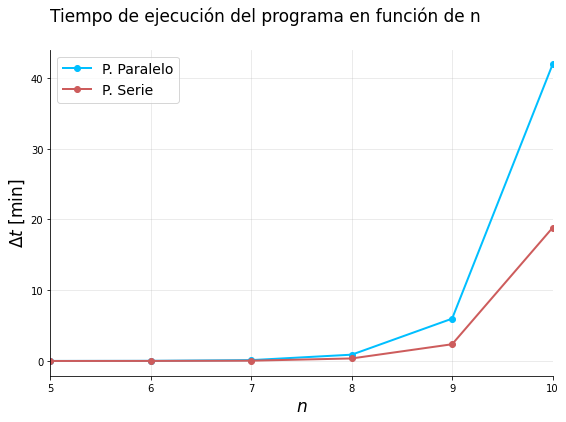

In [127]:
#@title <font color = 'green'>Evolución del tiempo de ejecución con el n</font>

# Gráficas

fig, ax = plt.subplots(1, figsize = (9,6))

plt.suptitle(r'Tiempo de ejecución del programa en función de n',
             fontsize = 17, ha = 'left', x = 0.125, y = 0.98)

ax.plot(n,time_p,'-o', color = 'deepskyblue', linewidth = 2, label = r'P. Paralelo')
ax.plot(n,time_s,'-o', color = 'indianred', linewidth = 2, label = r'P. Serie')

ax.set_xlabel(r'$n$', fontsize = 17)
ax.set_ylabel(r'$\Delta t$ [min]', fontsize = 17)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlim(min(n),max(n))

ax.legend(fontsize = 14)
ax.grid(alpha=0.3)


In [115]:
#@title <font color = 'green'>Ejemplo de ejecución para n = 6</font>

print('\nEn paralelo:\n')

paralelo(6)



En paralelo:



/usr/local/lib/python3.7/dist-packages/anomalies/anomaly.py:49: RuntimeWarning: invalid value encountered in true_divide
  self.simplified=(zz/self.gcd).astype(int)
/usr/local/lib/python3.7/dist-packages/anomalies/anomaly.py:49: RuntimeWarning: invalid value encountered in true_divide
  self.simplified=(zz/self.gcd).astype(int)



El conjunto de soluciones quirales (No triviales) para n = 6 con valores en el rango [-30,30], 
los correspondientes conjuntos de k-l, con m = 2, y el máximo común divisor respectivo son:



,"(k1, .., km, l1, ..., lm)",Sol,mcd
345,"[-2, 1, -2, -1]","[-16, 19, 20, -26, -26, 29]",1
140,"[-3, 1, 1, -3]","[-3, -5, -7, 19, 21, -25]",2
177,"[-3, 2, 2, -1]","[-11, 14, 16, -21, -24, 26]",2
166,"[-3, 2, -1, -2]","[-1, -3, -8, 13, 23, -24]",1
573,"[-1, 1, 3, -2]","[-1, 3, 15, -19, -23, 25]",2
...,...,...,...
8,"[-3, -3, -2, -1]","[-1, 1, -2, 2, -3, 3]",5
14,"[-3, -3, -1, -1]","[-1, -1, 1, 1, -3, 3]",4
230,"[-2, -3, -1, -1]","[-1, 1, -2, -2, 2, 2]",3
263,"[-2, -2, -1, -1]","[-1, -1, 1, 1, -2, 2]",3


In [116]:
#@title

print('\nEn serie\n:')

serie(6)


En serie
:


/usr/local/lib/python3.7/dist-packages/anomalies/anomaly.py:49: RuntimeWarning: invalid value encountered in true_divide
  self.simplified=(zz/self.gcd).astype(int)



El conjunto de soluciones quirales (No triviales) para n = 6 con valores en el rango [-30,30], 
los correspondientes conjuntos de k-l, con m = 2, y el máximo común divisor respectivo son:



,"(k1, .., km, l1, ..., lm)",Sol,mcd
345,"[-2, 1, -2, -1]","[-16, 19, 20, -26, -26, 29]",1
140,"[-3, 1, 1, -3]","[-3, -5, -7, 19, 21, -25]",2
177,"[-3, 2, 2, -1]","[-11, 14, 16, -21, -24, 26]",2
166,"[-3, 2, -1, -2]","[-1, -3, -8, 13, 23, -24]",1
573,"[-1, 1, 3, -2]","[-1, 3, 15, -19, -23, 25]",2
...,...,...,...
8,"[-3, -3, -2, -1]","[-1, 1, -2, 2, -3, 3]",5
14,"[-3, -3, -1, -1]","[-1, -1, 1, 1, -3, 3]",4
230,"[-2, -3, -1, -1]","[-1, 1, -2, -2, 2, 2]",3
263,"[-2, -2, -1, -1]","[-1, -1, 1, 1, -2, 2]",3


## <font color="indianred">Conclusión:</font>

### Dado que para todo el n en que se evaluó el programa el tiempo de ejecución es superior en la implementación en paralelo, concluyo que este recurso se está usando de forma inadecuada.
